In [1]:
import pandas as pd
import matplotlib.pyplot as plt

***La tabla Terapia fisica contiene el histórico de cada persona en el programa sobre valoraciones (clinimetrías y otras mediciones) registradas cada consulta***<br>

Parece que que aquí los id son reales :|

In [2]:
df_Terapia_fisica = pd.read_excel("data/Terapia fisica.xlsx")
print(df_Terapia_fisica.columns)

Index(['id', 'Tipo ID', 'Fecha', 'Frecuencia cita', 'Modalidad cita',
       'Pregunta', 'Sí/No', 'Sede de atención'],
      dtype='object')


In [3]:
df_Terapia_fisica

,id,Tipo ID,Fecha,Frecuencia cita,Modalidad cita,Pregunta,Sí/No,Sede de atención
0,1239594,CC,2018-10-10 08:36:33,4 MESES,SEGUIMIENTO PRESENCIAL,TRATAMIENTO CON MEDICAMENTO QUE REQUIERA AJUST...,NO,NaN
1,1239594,CC,2018-10-10 08:36:33,4 MESES,SEGUIMIENTO PRESENCIAL,SINDROME METABOLICO,NO,NaN
2,1239594,CC,2018-10-10 08:36:33,4 MESES,SEGUIMIENTO PRESENCIAL,OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE,SI,NaN
3,1239594,CC,2018-10-10 08:36:33,4 MESES,SEGUIMIENTO PRESENCIAL,PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICA...,NO,NaN
4,1239594,CC,2018-10-10 08:36:33,4 MESES,SEGUIMIENTO PRESENCIAL,ALTA POR TERAPIA FISICA,NO,NaN
...,...,...,...,...,...,...,...,...
9389,1119032,CC,2020-05-30 11:43:18,4 MESES,SEGUIMIENTO PRESENCIAL,SINDROME METABOLICO,SI,Cali
9390,1119032,CC,2020-05-30 11:43:18,4 MESES,SEGUIMIENTO PRESENCIAL,OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE,NO,Cali
9391,1119032,CC,2020-05-30 11:43:18,4 MESES,SEGUIMIENTO PRESENCIAL,PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICA...,SI,Cali
9392,1119032,CC,2020-05-30 11:43:18,4 MESES,SEGUIMIENTO PRESENCIAL,ALTA POR TERAPIA FISICA,NO,Cali


In [4]:
IDs_Unicos=df_Terapia_fisica[['id','Modalidad cita','Fecha']].copy()
IDs_Unicos=IDs_Unicos.drop_duplicates(keep="first").reset_index().sort_values('id',ascending=True)
#IDs_Unicos=IDs_Unicos.drop_duplicates(keep="first").sort_values('ID',ascending=True)
#IDs_Unicos.drop('index',axis=1,inplace=True)
IDs_Unicos
#IDs_Unicos.pivot(values='index',index='ID',columns='Resultado Total')
table=pd.pivot_table(IDs_Unicos,values='Fecha',index='id',columns='Modalidad cita',aggfunc='max')
df_IDs_Unicos=pd.DataFrame(data=table)
df_IDs_Unicos

Modalidad cita,Alta del Programa,SEGUIMIENTO PRESENCIAL
id,,
502369,NaT,2020-04-08 10:34:53
506165,NaT,2020-03-27 11:11:45
512876,NaT,2020-05-27 15:36:12
513721,NaT,2020-04-06 16:51:57
521350,NaT,2020-01-18 11:29:00
...,...,...
3493240,NaT,2020-05-08 08:27:10
3495945,NaT,2020-04-21 11:16:19
3496124,NaT,2020-04-22 09:31:03


In [5]:
df_tf_g0=IDs_Unicos.groupby(['id','Modalidad cita'],as_index=True).count()['Fecha'].unstack('Modalidad cita')
df_tf_g0.fillna(0,inplace=True)
df_tf_g0['Terapias_totales']=df_tf_g0['Alta del Programa']+df_tf_g0['SEGUIMIENTO PRESENCIAL']
df_tf_g0

Modalidad cita,Alta del Programa,SEGUIMIENTO PRESENCIAL,Terapias_totales
id,,,
502369,0.0,5.0,5.0
506165,0.0,2.0,2.0
512876,0.0,3.0,3.0
513721,0.0,2.0,2.0
521350,0.0,1.0,1.0
...,...,...,...
3493240,0.0,2.0,2.0
3495945,0.0,3.0,3.0
3496124,0.0,1.0,1.0


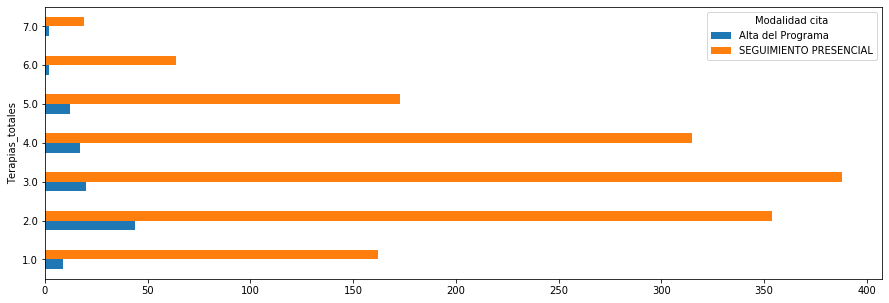

In [6]:
df_tf_g0.groupby(['Terapias_totales']).sum().plot(kind='barh',figsize=(15,5))

In [7]:
df_tf_g1=df_Terapia_fisica.groupby(['Frecuencia cita'],as_index=True).nunique()
df_tf_g1 #Mapeo de Frecuencia cita

,id,Tipo ID,Fecha,Frecuencia cita,Modalidad cita,Pregunta,Sí/No,Sede de atención
Frecuencia cita,,,,,,,,
1,39,2,42,1,1,6,2,2
2,28,2,35,1,1,6,2,2
3,132,2,174,1,1,6,2,2
4,51,1,65,1,1,6,2,2
5,4,1,5,1,1,6,2,2
6,64,1,75,1,1,6,2,2
7,2,1,2,1,1,6,2,1
8,6,2,8,1,1,6,2,1
10,10,1,12,1,1,6,2,1


In [8]:
df_tf_g1_clean=df_Terapia_fisica.copy().sort_values(by=['id','Fecha'])
df_tf_g1_clean['Fecha_AMD']=df_tf_g1_clean['Fecha'].dt.floor('d')
df_tf_g1_clean.reset_index(inplace=True)
df_tf_g1_clean

,index,id,Tipo ID,Fecha,Frecuencia cita,Modalidad cita,Pregunta,Sí/No,Sede de atención,Fecha_AMD
0,1680,502369,CC,2018-10-31 08:09:59,4 MESES,SEGUIMIENTO PRESENCIAL,TRATAMIENTO CON MEDICAMENTO QUE REQUIERA AJUST...,NO,Almacentro Piso 11,2018-10-31
1,1681,502369,CC,2018-10-31 08:09:59,4 MESES,SEGUIMIENTO PRESENCIAL,SINDROME METABOLICO,NO,Almacentro Piso 11,2018-10-31
2,1682,502369,CC,2018-10-31 08:09:59,4 MESES,SEGUIMIENTO PRESENCIAL,OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE,SI,Almacentro Piso 11,2018-10-31
3,1683,502369,CC,2018-10-31 08:09:59,4 MESES,SEGUIMIENTO PRESENCIAL,PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICA...,NO,Almacentro Piso 11,2018-10-31
4,1684,502369,CC,2018-10-31 08:09:59,4 MESES,SEGUIMIENTO PRESENCIAL,ALTA POR TERAPIA FISICA,NO,Almacentro Piso 11,2018-10-31
...,...,...,...,...,...,...,...,...,...,...
9389,7817,3499725,CC,2020-04-20 11:53:01,6 MESES,SEGUIMIENTO PRESENCIAL,SINDROME METABOLICO,NO,Almacentro Piso 11,2020-04-20
9390,7818,3499725,CC,2020-04-20 11:53:01,6 MESES,SEGUIMIENTO PRESENCIAL,OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE,NO,Almacentro Piso 11,2020-04-20
9391,7819,3499725,CC,2020-04-20 11:53:01,6 MESES,SEGUIMIENTO PRESENCIAL,PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICA...,SI,Almacentro Piso 11,2020-04-20
9392,7820,3499725,CC,2020-04-20 11:53:01,6 MESES,SEGUIMIENTO PRESENCIAL,ALTA POR TERAPIA FISICA,NO,Almacentro Piso 11,2020-04-20


In [9]:
df_tf_g1_clean.loc[(df_tf_g1_clean['id']==1929622)&(df_tf_g1_clean['Fecha_AMD']=='2019-10-11')]

,index,id,Tipo ID,Fecha,Frecuencia cita,Modalidad cita,Pregunta,Sí/No,Sede de atención,Fecha_AMD
4793,3964,1929622,CC,2019-10-11 07:18:00,6 MESES,SEGUIMIENTO PRESENCIAL,TRATAMIENTO CON MEDICAMENTO QUE REQUIERA AJUST...,NO,Almacentro Piso 11,2019-10-11
4794,3965,1929622,CC,2019-10-11 07:18:00,6 MESES,SEGUIMIENTO PRESENCIAL,SINDROME METABOLICO,NO,Almacentro Piso 11,2019-10-11
4795,3966,1929622,CC,2019-10-11 07:18:00,6 MESES,SEGUIMIENTO PRESENCIAL,OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE,NO,Almacentro Piso 11,2019-10-11
4796,3967,1929622,CC,2019-10-11 07:18:00,6 MESES,SEGUIMIENTO PRESENCIAL,PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICA...,NO,Almacentro Piso 11,2019-10-11
4797,3968,1929622,CC,2019-10-11 07:18:00,6 MESES,SEGUIMIENTO PRESENCIAL,ALTA POR TERAPIA FISICA,NO,Almacentro Piso 11,2019-10-11
4798,3969,1929622,CC,2019-10-11 07:18:00,6 MESES,SEGUIMIENTO PRESENCIAL,OTRO MOTIVO,SI,Almacentro Piso 11,2019-10-11
4799,22,1929622,CC,2019-10-11 07:18:58,6 MESES,SEGUIMIENTO PRESENCIAL,TRATAMIENTO CON MEDICAMENTO QUE REQUIERA AJUST...,NO,Almacentro Piso 11,2019-10-11
4800,23,1929622,CC,2019-10-11 07:18:58,6 MESES,SEGUIMIENTO PRESENCIAL,SINDROME METABOLICO,NO,Almacentro Piso 11,2019-10-11
4801,24,1929622,CC,2019-10-11 07:18:58,6 MESES,SEGUIMIENTO PRESENCIAL,OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE,NO,Almacentro Piso 11,2019-10-11
4802,25,1929622,CC,2019-10-11 07:18:58,6 MESES,SEGUIMIENTO PRESENCIAL,PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICA...,NO,Almacentro Piso 11,2019-10-11


In [10]:
df_tf_g1_clean.drop_duplicates(subset=['id','Fecha_AMD','Modalidad cita','Pregunta','Sí/No'],keep='first',inplace=True,ignore_index=True)

In [11]:
df_tf_g1_clean.loc[(df_tf_g1_clean['id']==1929622)&(df_tf_g1_clean['Fecha_AMD']=='2019-10-11')]

,index,id,Tipo ID,Fecha,Frecuencia cita,Modalidad cita,Pregunta,Sí/No,Sede de atención,Fecha_AMD
4211,3964,1929622,CC,2019-10-11 07:18:00,6 MESES,SEGUIMIENTO PRESENCIAL,TRATAMIENTO CON MEDICAMENTO QUE REQUIERA AJUST...,NO,Almacentro Piso 11,2019-10-11
4212,3965,1929622,CC,2019-10-11 07:18:00,6 MESES,SEGUIMIENTO PRESENCIAL,SINDROME METABOLICO,NO,Almacentro Piso 11,2019-10-11
4213,3966,1929622,CC,2019-10-11 07:18:00,6 MESES,SEGUIMIENTO PRESENCIAL,OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE,NO,Almacentro Piso 11,2019-10-11
4214,3967,1929622,CC,2019-10-11 07:18:00,6 MESES,SEGUIMIENTO PRESENCIAL,PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICA...,NO,Almacentro Piso 11,2019-10-11
4215,3968,1929622,CC,2019-10-11 07:18:00,6 MESES,SEGUIMIENTO PRESENCIAL,ALTA POR TERAPIA FISICA,NO,Almacentro Piso 11,2019-10-11
4216,3969,1929622,CC,2019-10-11 07:18:00,6 MESES,SEGUIMIENTO PRESENCIAL,OTRO MOTIVO,SI,Almacentro Piso 11,2019-10-11


In [12]:
df_tf_g1_clean

,index,id,Tipo ID,Fecha,Frecuencia cita,Modalidad cita,Pregunta,Sí/No,Sede de atención,Fecha_AMD
0,1680,502369,CC,2018-10-31 08:09:59,4 MESES,SEGUIMIENTO PRESENCIAL,TRATAMIENTO CON MEDICAMENTO QUE REQUIERA AJUST...,NO,Almacentro Piso 11,2018-10-31
1,1681,502369,CC,2018-10-31 08:09:59,4 MESES,SEGUIMIENTO PRESENCIAL,SINDROME METABOLICO,NO,Almacentro Piso 11,2018-10-31
2,1682,502369,CC,2018-10-31 08:09:59,4 MESES,SEGUIMIENTO PRESENCIAL,OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE,SI,Almacentro Piso 11,2018-10-31
3,1683,502369,CC,2018-10-31 08:09:59,4 MESES,SEGUIMIENTO PRESENCIAL,PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICA...,NO,Almacentro Piso 11,2018-10-31
4,1684,502369,CC,2018-10-31 08:09:59,4 MESES,SEGUIMIENTO PRESENCIAL,ALTA POR TERAPIA FISICA,NO,Almacentro Piso 11,2018-10-31
...,...,...,...,...,...,...,...,...,...,...
8248,7817,3499725,CC,2020-04-20 11:53:01,6 MESES,SEGUIMIENTO PRESENCIAL,SINDROME METABOLICO,NO,Almacentro Piso 11,2020-04-20
8249,7818,3499725,CC,2020-04-20 11:53:01,6 MESES,SEGUIMIENTO PRESENCIAL,OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE,NO,Almacentro Piso 11,2020-04-20
8250,7819,3499725,CC,2020-04-20 11:53:01,6 MESES,SEGUIMIENTO PRESENCIAL,PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICA...,SI,Almacentro Piso 11,2020-04-20
8251,7820,3499725,CC,2020-04-20 11:53:01,6 MESES,SEGUIMIENTO PRESENCIAL,ALTA POR TERAPIA FISICA,NO,Almacentro Piso 11,2020-04-20


In [13]:
df_tf_g2=df_Terapia_fisica.groupby(['Modalidad cita'],as_index=True).nunique()
df_tf_g2 #Mapeo de Modalidad cita

,id,Tipo ID,Fecha,Frecuencia cita,Modalidad cita,Pregunta,Sí/No,Sede de atención
Modalidad cita,,,,,,,,
Alta del Programa,82,2,106,1,1,6,2,1
SEGUIMIENTO PRESENCIAL,614,3,1475,14,1,6,2,2


In [14]:
df_tf_g1_clean.loc[(df_tf_g1_clean['Modalidad cita']=='Alta del Programa')&(df_tf_g1_clean['Sí/No']=='SI')].groupby(['Modalidad cita','Pregunta']).nunique()

,,index,id,Tipo ID,Fecha,Frecuencia cita,Modalidad cita,Pregunta,Sí/No,Sede de atención,Fecha_AMD
Modalidad cita,Pregunta,,,,,,,,,,
Alta del Programa,ALTA POR TERAPIA FISICA,90,82,2,90,1,1,1,1,1,42


In [15]:
df_tf_g1_clean.loc[(df_tf_g1_clean['Modalidad cita']=='SEGUIMIENTO PRESENCIAL')&(df_tf_g1_clean['Sí/No']=='SI')].groupby(['Modalidad cita','Pregunta']).nunique()

index  \
Modalidad cita         Pregunta                                                    
SEGUIMIENTO PRESENCIAL OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE          547   
                       OTRO MOTIVO                                           134   
                       PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICAM...    453   
                       SINDROME METABOLICO                                   218   
                       TRATAMIENTO CON MEDICAMENTO QUE REQUIERA AJUSTE...     91   

                                                                            id  \
Modalidad cita         Pregunta                                                  
SEGUIMIENTO PRESENCIAL OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE        345   
                       OTRO MOTIVO                                         114   
                       PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICAM...  321   
                       SINDROME METABOLICO                                 173   
                       TRATAMIENTO CON MEDICAMENTO QUE REQUIERA AJUSTE...   64   

                                                                           Tipo ID  \
Modalidad cita         Pregunta                                                      
SEGUIMIENTO PRESENCIAL OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE              2   
                       OTRO MOTIVO                                               3   
                       PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICAM...        3   
                       SINDROME METABOLICO                                       2   
                       TRATAMIENTO CON MEDICAMENTO QUE REQUIERA AJUSTE...        1   

                                                                           Fecha  \
Modalidad cita         Pregunta                                                    
SEGUIMIENTO PRESENCIAL OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE          547   
                       OTRO MOTIVO                                           134   
                       PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICAM...    453   
                       SINDROME METABOLICO                                   218   
                       TRATAMIENTO CON MEDICAMENTO QUE REQUIERA AJUSTE...     91   

                                                                           Frecuencia cita  \
Modalidad cita         Pregunta                                                              
SEGUIMIENTO PRESENCIAL OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE                     10   
                       OTRO MOTIVO                                                       9   
                       PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICAM...               10   
                       SINDROME METABOLICO                                               6   
                       TRATAMIENTO CON MEDICAMENTO QUE REQUIERA AJUSTE...                6   

                                                                           Modalidad cita  \
Modalidad cita         Pregunta                                                             
SEGUIMIENTO PRESENCIAL OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE                     1   
                       OTRO MOTIVO                                                      1   
                       PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICAM...               1   
                       SINDROME METABOLICO                                              1   
                       TRATAMIENTO CON MEDICAMENTO QUE REQUIERA AJUSTE...               1   

                                                                           Pregunta  \
Modalidad cita         Pregunta                                                       
SEGUIMIENTO PRESENCIAL OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE               1   
                       OTRO MOTIVO                                                1   
                       PACIENTES CON SOBREPESO (IMC 25-29) S

In [16]:
df_tf_g3=df_Terapia_fisica.groupby(['Pregunta'],as_index=True).nunique()
df_tf_g3 #Mapeo de Pregunta

,id,Tipo ID,Fecha,Frecuencia cita,Modalidad cita,Pregunta,Sí/No,Sede de atención
Pregunta,,,,,,,,
ALTA POR TERAPIA FISICA,640,3,1580,15,2,1,2,2
OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE,640,3,1580,15,2,1,2,2
OTRO MOTIVO,635,3,1476,15,2,1,2,2
PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICAMENTO QUE REQUIERA AJUSTE,640,3,1580,15,2,1,2,2
SINDROME METABOLICO,640,3,1580,15,2,1,2,2
TRATAMIENTO CON MEDICAMENTO QUE REQUIERA AJUSTE POR PESO CON SOBREPESO U OBESIDAD,640,3,1580,15,2,1,2,2


In [17]:
df_tf_g4=df_Terapia_fisica.groupby(['Sí/No'],as_index=True).nunique()
df_tf_g4 #Mapeo de Sí/No

,id,Tipo ID,Fecha,Frecuencia cita,Modalidad cita,Pregunta,Sí/No,Sede de atención
Sí/No,,,,,,,,
NO,640,3,1580,15,2,6,1,2
SI,640,3,1580,15,2,6,1,2


In [18]:
df_tf_g5=df_Terapia_fisica.groupby(['Sede de atención'],as_index=True).nunique()
df_tf_g5 #Mapeo de Sede de atención

,id,Tipo ID,Fecha,Frecuencia cita,Modalidad cita,Pregunta,Sí/No,Sede de atención
Sede de atención,,,,,,,,
Almacentro Piso 11,512,2,1310,15,2,6,2,1
Cali,124,2,217,8,1,6,2,1


In [19]:
print(df_Terapia_fisica.shape)
print(df_tf_g1_clean.shape)

(9394, 8)
(8253, 10)


In [23]:
df_tf_g1_clean.drop(columns=['Tipo ID'],inplace=True)
df_tf_g1_clean

,index,id,Fecha,Frecuencia cita,Modalidad cita,Pregunta,Sí/No,Sede de atención,Fecha_AMD
0,1680,502369,2018-10-31 08:09:59,4 MESES,SEGUIMIENTO PRESENCIAL,TRATAMIENTO CON MEDICAMENTO QUE REQUIERA AJUST...,NO,Almacentro Piso 11,2018-10-31
1,1681,502369,2018-10-31 08:09:59,4 MESES,SEGUIMIENTO PRESENCIAL,SINDROME METABOLICO,NO,Almacentro Piso 11,2018-10-31
2,1682,502369,2018-10-31 08:09:59,4 MESES,SEGUIMIENTO PRESENCIAL,OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE,SI,Almacentro Piso 11,2018-10-31
3,1683,502369,2018-10-31 08:09:59,4 MESES,SEGUIMIENTO PRESENCIAL,PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICA...,NO,Almacentro Piso 11,2018-10-31
4,1684,502369,2018-10-31 08:09:59,4 MESES,SEGUIMIENTO PRESENCIAL,ALTA POR TERAPIA FISICA,NO,Almacentro Piso 11,2018-10-31
...,...,...,...,...,...,...,...,...,...
8248,7817,3499725,2020-04-20 11:53:01,6 MESES,SEGUIMIENTO PRESENCIAL,SINDROME METABOLICO,NO,Almacentro Piso 11,2020-04-20
8249,7818,3499725,2020-04-20 11:53:01,6 MESES,SEGUIMIENTO PRESENCIAL,OBESIDAD (IMC >30) SIN MEDICAMENTO DE AJUSTE,NO,Almacentro Piso 11,2020-04-20
8250,7819,3499725,2020-04-20 11:53:01,6 MESES,SEGUIMIENTO PRESENCIAL,PACIENTES CON SOBREPESO (IMC 25-29) SIN MEDICA...,SI,Almacentro Piso 11,2020-04-20
8251,7820,3499725,2020-04-20 11:53:01,6 MESES,SEGUIMIENTO PRESENCIAL,ALTA POR TERAPIA FISICA,NO,Almacentro Piso 11,2020-04-20


In [24]:
df_tf_g1_clean['id'].nunique()

640

In [25]:
df_tf_g1_clean.to_csv("data/Terapia_fisica_DF.csv", index = False)